In [1]:
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings
import numpy as np
import MDAnalysis as mda
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings

In [2]:
arr1 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/min_dist_{i:03d}.npy') for i in range(11)]

In [3]:
arr2 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/contacts_{i:03d}.npy') for i in range(11)]

In [4]:
arr3 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/sidechain_dists_{i:03d}.npy') for i in range(11)]

In [5]:
arr4 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/ca_ca_{i:03d}.npy') for i in range(11)]

In [6]:
arr5 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/tor_{i:03d}.npy') for i in range(11)]

In [7]:
arr6 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/ca_pairs_{i:03d}.npy') for i in range(11)]

In [8]:
np.shape(arr6[0])

(17501, 224)

In [59]:
arr3 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_10.3/sidechain_dists_{i:03d}.npy') for i in range(3)]

In [60]:
arr4 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_10.3/coord_{i:03d}.npy') for i in range(3)]

In [61]:
arr5 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_10.3/ca_com_{i:03d}.npy') for i in range(3)]

In [6]:
arr4 = [pyemma.coordinates.load(f'../features_v1/ca_com_v1_{i:03d}.npy') for i in range(9)]

In [7]:
arr5 = [pyemma.coordinates.load(f'../features_v1/torsions_v1_{i:03d}.npy') for i in range(9)]

In [8]:
arr6 = [pyemma.coordinates.load(f'../features_v1/ca_v1_{i:03d}.npy') for i in range(9)]

In [9]:
combo_all = [np.concatenate([a1, a2, a3, a4, a5, a6], axis=1) for a1, a2, a3, a4, a5, a6 in zip(arr3, arr4, arr2, arr1, arr5, arr6)]


In [10]:
combo_ext = [np.concatenate([a1, a2, a3, a4], axis=1) for a1, a2, a3, a4 in zip(arr3, arr4, arr2, arr1)]


In [10]:
combo_all = [np.concatenate([a1, a2, a3], axis=1) for a1, a2, a3 in zip(arr1, arr2, arr3)]


In [9]:
combo_all = [np.concatenate([a1, a2], axis=1) for a1, a2 in zip(arr1, arr6)]


In [44]:
combo_all = [np.concatenate([a1, a2, a3], axis=1) for a1, a2, a3 in zip(arr1, arr2, arr3)]


In [10]:
np.shape(combo_all[0])

(17501, 261)

Now we have to start loading these into tICA


In [46]:
labels = ['min_dist','contacts','sidechain', 'combo']

In [47]:
def score_cv(data, dim, lag, number_of_splits=10, validation_fraction=0.5):
    """Compute a cross-validated VAMP2 score.

    We randomly split the list of independent trajectories into
    a training and a validation set, compute the VAMP2 score,
    and repeat this process several times.

    Parameters
    ----------
    data : list of numpy.ndarrays
        The input data.
    dim : int
        Number of processes to score; equivalent to the dimension
        after projecting the data with VAMP2.
    lag : int
        Lag time for the VAMP2 scoring.
    number_of_splits : int, optional, default=10
        How often do we repeat the splitting and score calculation.
    validation_fraction : int, optional, default=0.5
        Fraction of trajectories which should go into the validation
        set during a split.
    """
    # we temporarily suppress very short-lived progress bars
    with pyemma.util.contexts.settings(show_progress_bars=False):
        nval = int(len(data) * validation_fraction)
        scores = np.zeros(number_of_splits)
        for n in range(number_of_splits):
            ival = np.random.choice(len(data), size=nval, replace=False)
            vamp = pyemma.coordinates.vamp(
                [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim)
            scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
    return scores


[6.580659608919129]
[5.034852918379055]
[3.8906291449526327]


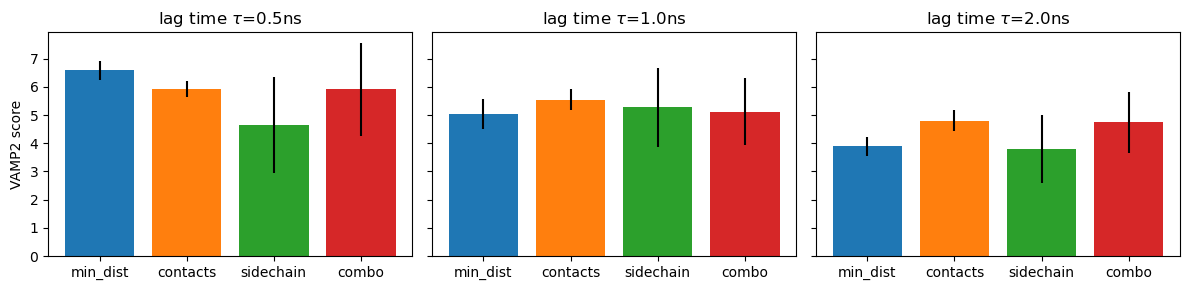

In [50]:


dim = 10

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for ax, lag in zip(axes.flat, [5, 10, 20, 100]):
    torsions_scores = score_cv(arr1, lag=lag, dim=dim)
    scores = [torsions_scores.mean()]
    errors = [torsions_scores.std()]
    print(scores)
    positions_scores = score_cv(arr2, lag=lag, dim=dim)
    scores += [positions_scores.mean()]
    errors += [positions_scores.std()]
    distances_scores = score_cv(arr3, lag=lag, dim=dim)
    scores += [distances_scores.mean()]
    errors += [distances_scores.std()]

    combo_all_scores = score_cv(combo_all, lag=lag, dim=dim)
    scores += [combo_all_scores.mean()]
    errors += [combo_all_scores.std()]

    ax.bar(labels, scores, yerr=errors, color=['C0', 'C1', 'C2','C3'])
    ax.set_title(r'lag time $\tau$={:.1f}ns'.format(lag * 0.1))
    if lag == 5:
        # save for later
        vamp_bars_plot = dict(
            labels=labels, scores=scores, errors=errors, dim=dim, lag=lag)
axes[0].set_ylabel('VAMP2 score')
fig.tight_layout()
plt.savefig('vamp2_scores.png',dpi=400)

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:242: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or len(trajfiles) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:384: SyntaxWarning: "is" with a literal. Did you mean "=="?
  and (any(isinstance(item, (list, tuple, _string_types)) for item in inp) or len(inp) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:388: SyntaxWarning: "is" with a literal. Did you mean "=="?
  and (any(isinstance(item, _np.ndarray) for item in inp) or len(inp) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/coordinates/api.py:242: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or len(trajfiles) is 0)):
/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/m

KeyboardInterrupt: 

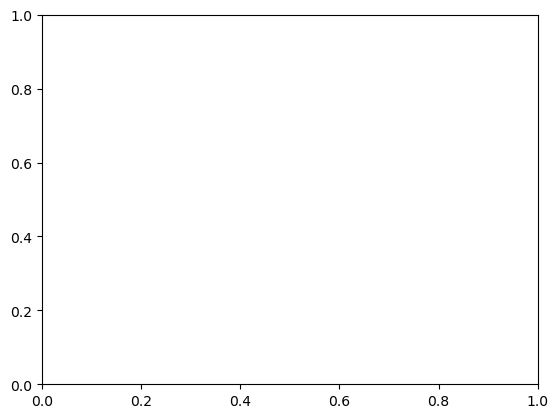

In [53]:
lags = [ 20, 50, 100]
dims = [i + 1 for i in range(25)]

fig, ax = plt.subplots()
for i, lag in enumerate(lags):
    scores_ = np.array([score_cv(combo_all, dim, lag)
                        for dim in dims])
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    color = 'C{}'.format(i)
    ax.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor=color)
    ax.plot(dims, scores, '--o', color=color, label='lag={:.1f}ns'.format(lag * 0.1))
ax.legend()
ax.set_xlabel('number of dimensions')
ax.set_ylabel('VAMP2 score')
fig.tight_layout()
plt.savefig('scores_dims.png',dpi=400)

In [99]:
np.shape(arr1[0])

(17501, 37)

In [52]:
tica_dev = pyemma.coordinates.tica(combo_all, lag=20)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                             | 0/11 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/11 [00:00<?, ?it/s]

In [13]:
tica_dev = pyemma.coordinates.tica(arr6, lag=50)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                             | 0/11 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/11 [00:00<?, ?it/s]

In [48]:
np.shape(combo_all[0])

(17501, 261)

In [80]:
np.shape(tica_concatenated)

(130963, 40)

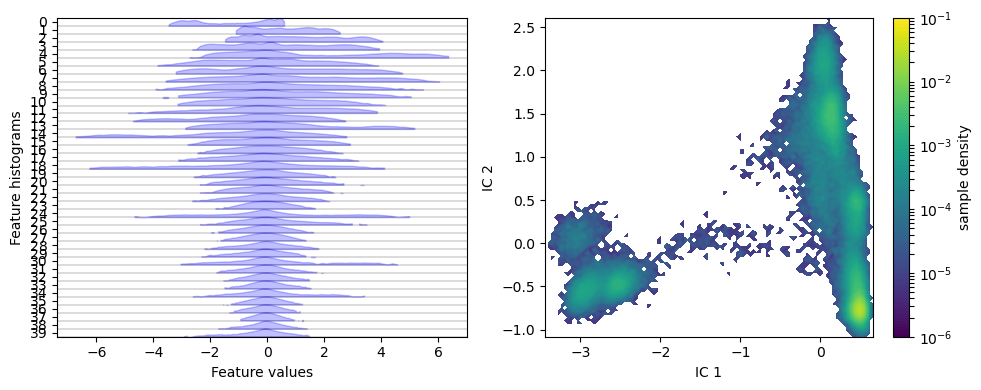

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_update.png', dpi= 300)

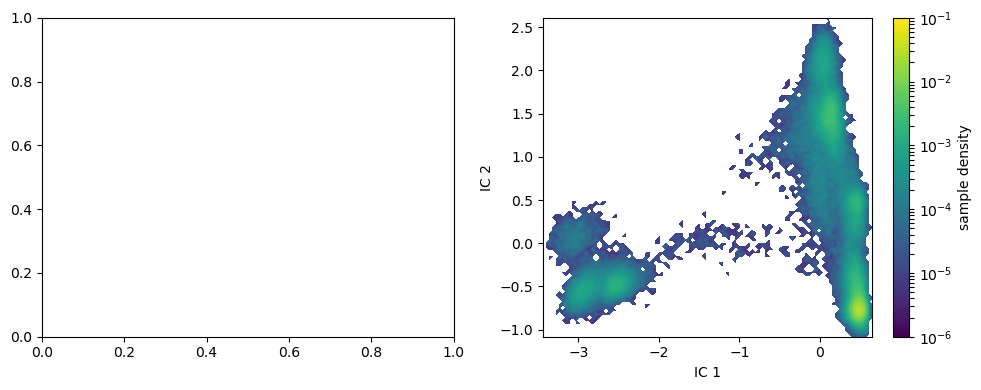

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/pyemma/plots/plots2d.py:251: UserWarning: bins=2000 is not an allowed optional parameter and will be ignored
  _warn(


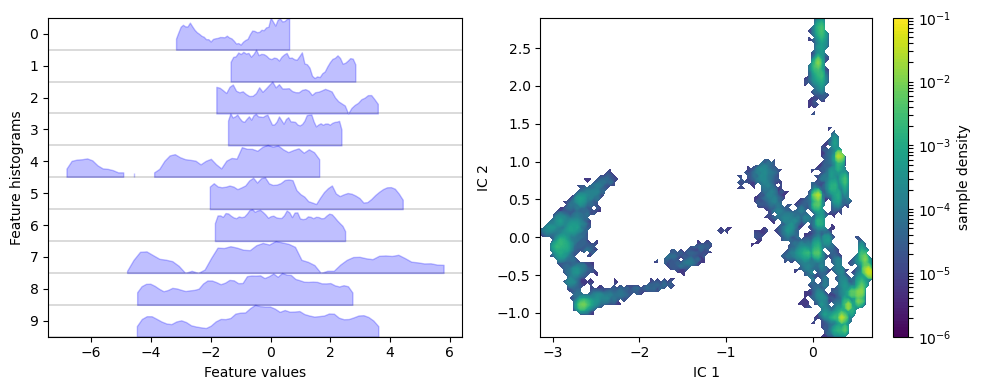

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)

# Increase the number of bins for more granularity
n_bins = 2000
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True, bins=n_bins)

axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_update.png', dpi= 300)


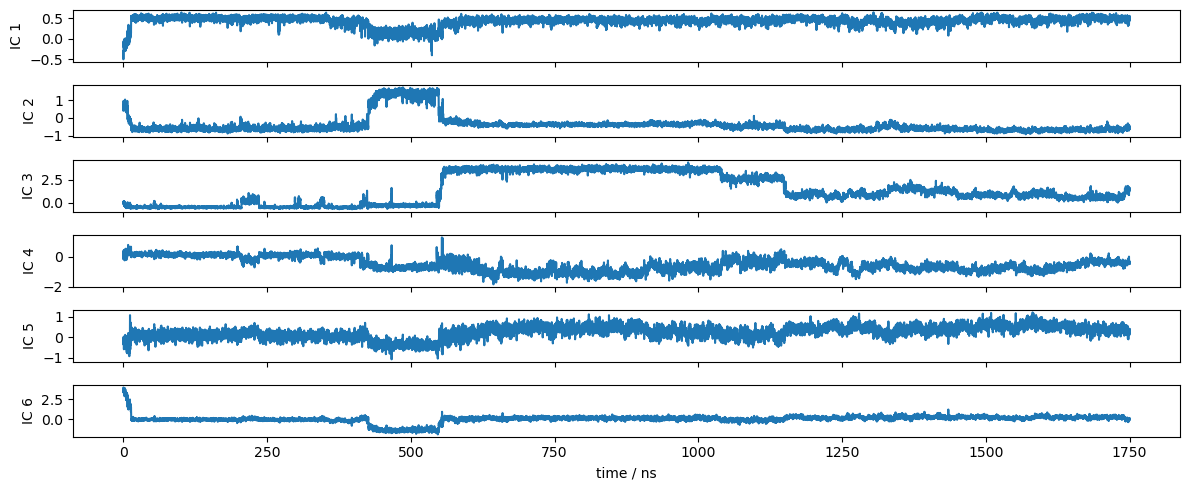

In [16]:
fig, axes = plt.subplots(6, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_out[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_out[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()
# plt.savefig('ics_update.png')

In [53]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_out, k=200, max_iter=200, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)


initialize kmeans++ centers:   0%|                      | 0/200 [00:00<?, ?it/s]

kmeans iterations:   0%|                                | 0/200 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|                | 0/11 [00:00<?, ?it/s]

In [84]:
cluster

KmeansClustering(clustercenters=array([[-0.39594,  0.58774, ...,  0.30853,  0.28889],
       [ 0.58688, -0.6382 , ...,  0.10755,  0.06051],
       ...,
       [ 0.62452, -0.67608, ..., -0.08456, -0.07427],
       [ 0.07875,  1.26919, ..., -0.0271 ,  0.04128]], dtype=float32),
         fixed_seed=1, init_strategy='kmeans++', keep_data=False,
         max_iter=200, metric='euclidean', n_clusters=200, n_jobs=40,
         oom_strategy='memmap', skip=0, stride=1, tolerance=1e-05)

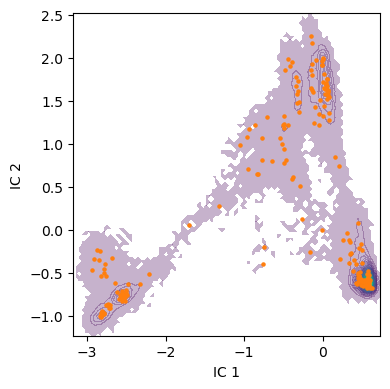

In [83]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('cluster_update.png',dpi=300)

In [36]:
pwd


'/scratch/general/nfs1/u1266568/msm_v2.2/tica'

estimating BayesianMSM:   0%|                            | 0/17 [00:00<?, ?it/s]

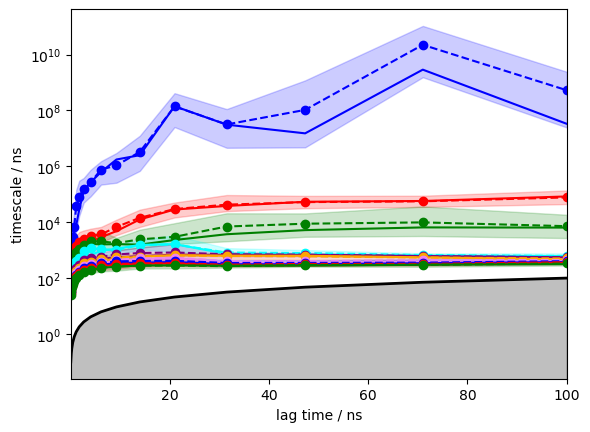

In [58]:
its = pyemma.msm.its(cluster.dtrajs, lags=1000, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);
# plt.savefig('its_update.png',dpi=300)

In [59]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=200, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[94]: compute stat. inefficiencies

pyemma.msm.estimators.bayesian_msm.BayesianMSM[94]: Sampling MSMs:   0%| | 0/100

fraction of states used = 1.00
fraction of counts used = 1.00


In [60]:
T = msm.transition_matrix

In [61]:
np.shape(T)

(200, 200)

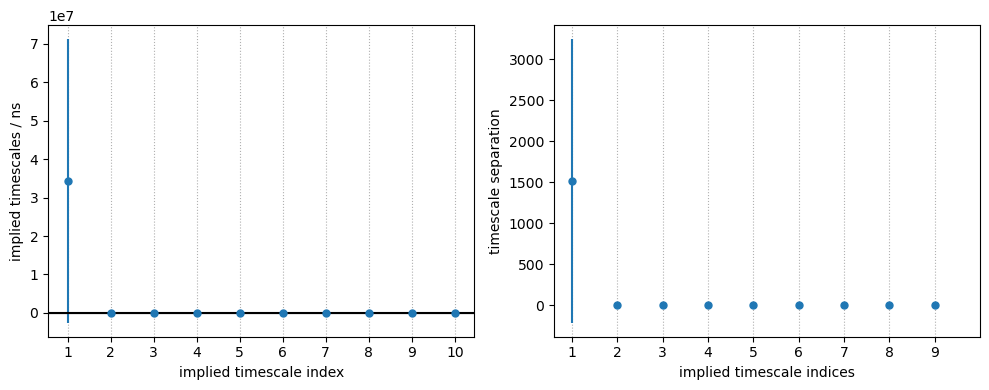

In [62]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
# axes[1].set_xticklabels(
#     ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
#     rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
# plt.savefig('4state_spectral_update.png',dpi=300)

In [63]:
from scipy.cluster.hierarchy import linkage, fcluster

# Using the transition matrix to compute distances
distance_matrix = 1.0 - msm.transition_matrix

# Hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Cut the dendrogram to get a fixed number of clusters
n_clusters = 4
clusters4 = fcluster(Z, t=n_clusters, criterion='maxclust')


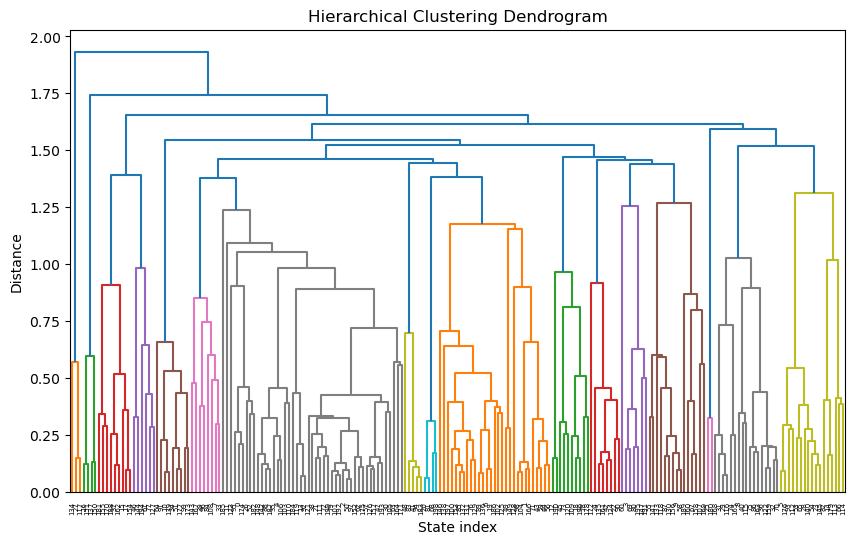

In [64]:

from scipy.cluster.hierarchy import dendrogram

# Plotting the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.axhline(y=n_clusters, color='r', linestyle='--')  # To show where you've cut the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('State index')
plt.ylabel('Distance')
plt.show()


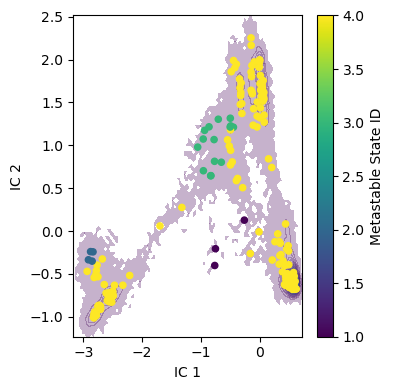

In [78]:
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the tICA density
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)

# Overlay the kmeans cluster centers, colored by their hierarchical clustering assignments
sc = ax.scatter(*cluster.clustercenters[:, :2].T, s=20, c=clusters4, cmap='viridis')

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Metastable State ID')
fig.tight_layout()
plt.show()


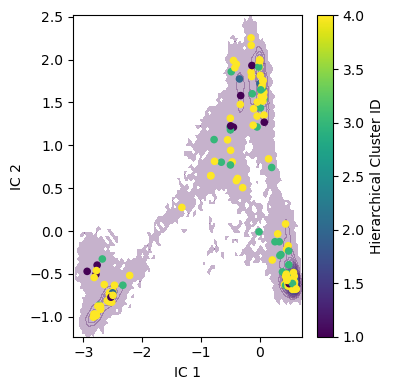

In [54]:
#FILTERED

# Identify active cluster centers
active_clustercenters = cluster.clustercenters[msm.active_set, :]

# Since clusters4 should already correspond to the active set:
active_clusters4 = clusters4

# Plot
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
sc = ax.scatter(*active_clustercenters[:, :2].T, s=20, c=active_clusters4, cmap='viridis')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Hierarchical Cluster ID')
fig.tight_layout()


Number of identified clusters: 1
Number of noise points: 7


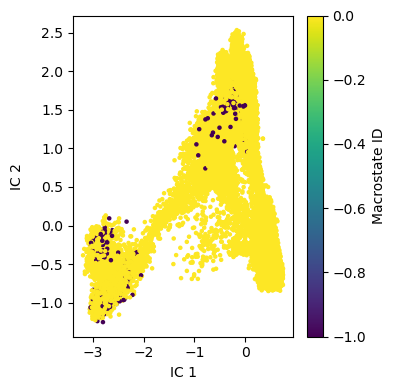

In [96]:
from sklearn.cluster import DBSCAN

# Use the k-means cluster centers for density-based clustering
dbscan = DBSCAN(eps=10.0, min_samples=4).fit(cluster.clustercenters)

# Getting cluster labels
labels = dbscan.labels_

# Number of clusters (ignoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Number of identified clusters: {n_clusters_}')
print(f'Number of noise points: {n_noise_}')

# Map the macrostate assignments back to the original data points
macrostate_assignments = labels[dtrajs_concatenated]

# Plot
fig, ax = plt.subplots(figsize=(4, 4))
sc = ax.scatter(tica_concatenated[:, 0], tica_concatenated[:, 1], c=macrostate_assignments, s=5, cmap='viridis')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Macrostate ID')
fig.tight_layout()


estimating BayesianMSM:   0%|                             | 0/9 [00:00<?, ?it/s]

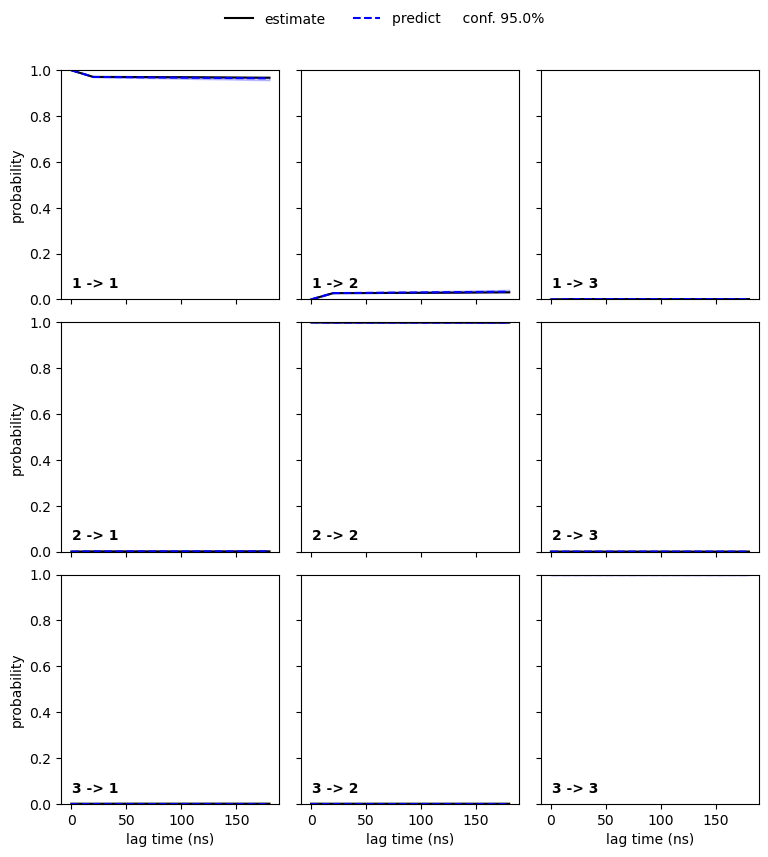

In [127]:
nstates = 3
cktest = msm.cktest(nstates)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
# plt.savefig('cktets.png',dpi = 300)

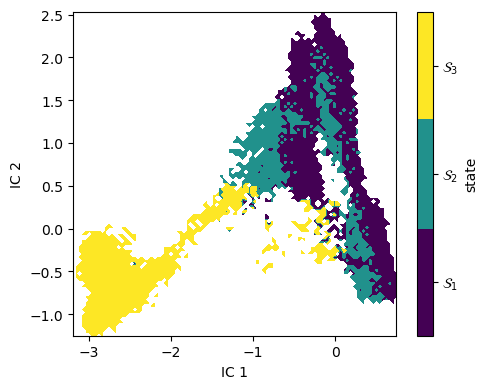

In [128]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update.png',dpi=400)

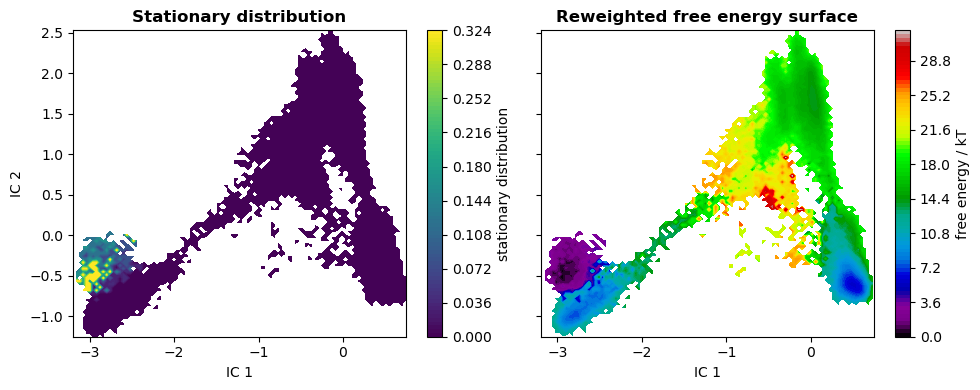

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
# plt.savefig('macro_energy_update.png',dpi=400)

/tmp/ipykernel_3244753/2709779281.py:2: RuntimeWarning: invalid value encountered in log
  implied_timescales = -20 / np.log(eigenvalues)


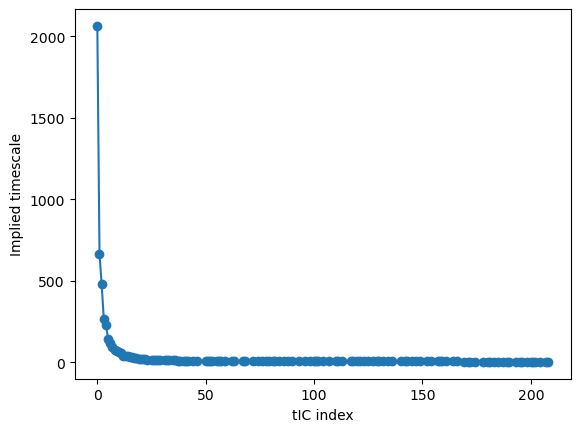

In [25]:
eigenvalues = tica_dev.eigenvalues
implied_timescales = -20 / np.log(eigenvalues)
plt.plot(implied_timescales, 'o-')
plt.xlabel('tIC index')
plt.ylabel('Implied timescale')
plt.show()


/tmp/ipykernel_36421/3306271696.py:13: RuntimeWarning: divide by zero encountered in log
  fes_kBT = -np.log(hist)


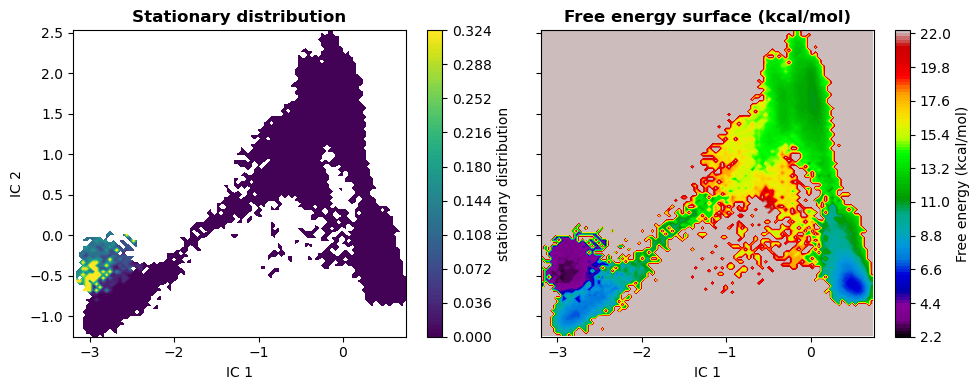

In [69]:
kB = 1.9872036e-3  # kcal/mol·K
T = 310  # You need to provide the temperature in Kelvin

# Compute 2D histogram
hist, xedges, yedges = np.histogram2d(
    tica_concatenated[:, 0], tica_concatenated[:, 1], 
    bins=100, weights=np.concatenate(msm.trajectory_weights()))

# Convert histogram to probability
hist /= hist.sum()

# Convert probabilities to free energy in units of kBT
fes_kBT = -np.log(hist)

# Handle infinities
fes_kBT[np.isinf(fes_kBT)] = fes_kBT[~np.isinf(fes_kBT)].max()

# Convert the free energy to kcal/mol
fes_kcal_per_mol = fes_kBT * kB * T

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

# Plot stationary distribution
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')

# Plot free energy in kcal/mol
contourf = axes[1].contourf(
    (xedges[:-1] + xedges[1:]) / 2,
    (yedges[:-1] + yedges[1:]) / 2,
    fes_kcal_per_mol.T,  # transpose due to how meshgrid works
    levels=100,  # you can adjust the number of levels or provide explicit levels
    cmap='nipy_spectral'
)
cbar = fig.colorbar(contourf, ax=axes[1])
cbar.set_label('Free energy (kcal/mol)')

for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Free energy surface (kcal/mol)', fontweight='bold')
fig.tight_layout()
# plt.savefig('2state_pmf.png',dpi=400)


In [143]:
pwd


'/scratch/general/nfs1/u1266568/msm_v2.2/tica'

In [70]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3,4
1,0.000000e+00,2.709658e+09,3.752207e+09,47276203.94
2,1.587558e+10,0.000000e+00,3.534857e+08,52899414.63
3,1.587023e+10,3.561245e+06,0.000000e+00,53592532.92
4,4.460711e+10,3.100784e+10,3.262988e+10,0.00


In [71]:
from itertools import product
import numpy as np
from pandas import DataFrame

# Assuming you have previously defined nstates as the number of metastable states you want
# and msm, the Markov state model object

# Create a list of sets for each cluster. Each set contains the indices of the microstates 
# belonging to a given metastable state.
metastable_sets = [np.where(clusters6 == i)[0] for i in range(1, nstates + 1)]

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(metastable_sets[i], metastable_sets[j])
    

print('MFPT / ns:')
df = DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))
print(df)


MFPT / ns:
              1           2       3          4
1  0.000000e+00      251.53  192.98  503185.33
2  1.239001e+09        0.00  270.94  488291.49
3  3.104282e+10  9013698.34    0.00    1299.47
4  3.112031e+10  9040610.58  359.06       0.00


In [18]:
from itertools import product
import numpy as np
from pandas import DataFrame

# Assuming you have previously defined n_clusters as the number of clusters you want
# and msm, the Markov state model object

# Create a list of sets for each cluster. Each set contains the indices of the states 
# belonging to a given cluster.
cluster_sets = [np.where(clusters6 == i)[0] for i in range(1, n_clusters + 1)]

mfpt = np.zeros((n_clusters, n_clusters))
for i, j in product(range(n_clusters), repeat=2):
    mfpt[i, j] = msm.mfpt(cluster_sets[i], cluster_sets[j])

print('MFPT / ns:')
df = DataFrame(np.round(mfpt, decimals=2), index=range(1, n_clusters + 1), columns=range(1, n_clusters + 1))
print(df)


MFPT / ns:
              1             2            3             4             5  \
1  0.000000e+00  3.469939e+07   9109288.45  9.099630e+07  3.469591e+07   
2  3.200590e+08  0.000000e+00  10457728.38  5.905592e+07  2.701442e+04   
3  5.507007e+08  2.662327e+08         0.00  3.228409e+08  2.662274e+08   
4  3.196372e+08  2.471081e+06  10359825.61  0.000000e+00  2.567775e+06   
5  3.200609e+08  3.582065e+04  10458149.36  5.910362e+07  0.000000e+00   
6  3.200533e+08  6.883703e+06  10198296.98  6.526113e+07  6.895588e+06   

              6  
1  9.692045e+06  
2  3.828310e+03  
3  2.350920e+08  
4  3.686340e+03  
5  5.524300e+03  
6  0.000000e+00  


In [31]:
T = msm.transition_matrix


In [74]:
# Number of metastable states
n_metastable_states = n_clusters

# Create a mapping from the original states to the metastable states
metastable_assignments = {i: cluster_id for i, cluster_id in enumerate(clusters4)}

# Generate sets for each metastable state containing its constituent microstates
metastable_sets = [set() for _ in range(n_metastable_states)]
for original_state, metastable_state in metastable_assignments.items():
    metastable_sets[metastable_state - 1].add(original_state)

# Compute transition probabilities between metastable states
T = msm.transition_matrix
metastable_T = np.zeros((n_metastable_states, n_metastable_states))
for i in range(n_metastable_states):
    for j in range(n_metastable_states):
        metastable_T[i, j] = np.sum(T[list(metastable_sets[i]), :][:, list(metastable_sets[j])])

# View the results
import pandas as pd
df = pd.DataFrame(metastable_T, index=range(1, n_metastable_states + 1), columns=range(1, n_metastable_states + 1))
print(df/2)


          1         2         3          4
1  0.056621  0.000000  0.000000   1.443379
2  0.000000  0.392064  0.000000   1.607936
3  0.000000  0.000000  7.105118   0.394882
4  0.659283  1.486925  0.138465  86.715326


In [30]:
# Given your code:
A = msm.metastable_sets[0]
B = np.concatenate(msm.metastable_sets[2:])

mfpt_A_to_B_mean = msm.sample_mean('mfpt', B, A)
mfpt_A_to_B_std = msm.sample_std('mfpt', B, A)

# Calculate the off-rate from the MFPT
k_off_mean = 1 / mfpt_A_to_B_mean
print(k_off_mean)
k_off_std = k_off_mean * (mfpt_A_to_B_std / mfpt_A_to_B_mean)  # Error propagation for the inverse

print(f"Off-rate (from A to B): {k_off_mean:.2e} ± {k_off_std:.2e} 1/ns")


2.7514787921663173e-12
Off-rate (from A to B): 2.75e-12 ± 4.22e-12 1/ns


In [171]:
# Given your code:
A = msm.metastable_sets[2]
B = np.concatenate(msm.metastable_sets[1:])

mfpt_A_to_B_mean = msm.sample_mean('mfpt', B, A)
mfpt_A_to_B_std = msm.sample_std('mfpt', B, A)

# Calculate the off-rate from the MFPT
k_off_mean = 1 / mfpt_A_to_B_mean
print(k_off_mean)
k_off_std = k_off_mean * (mfpt_A_to_B_std / mfpt_A_to_B_mean)  # Error propagation for the inverse

print(f"Off-rate (from A to B): {k_off_mean:.2e} ± {k_off_std:.2e} 1/ns")


IndexError: list index out of range

In [188]:
# Given your code:
C = msm.metastable_sets[1]
A = msm.metastable_sets[0]

mfpt_A_to_B_mean = msm.sample_mean('mfpt', C, A)
mfpt_A_to_B_std = msm.sample_std('mfpt', C, A)

# Calculate the off-rate from the MFPT
k_off_mean = 1 / mfpt_A_to_B_mean
print(k_off_mean)
k_off_std = k_off_mean * (mfpt_A_to_B_std / mfpt_A_to_B_mean)  # Error propagation for the inverse

print(f"Off-rate (from A to B): {k_off_mean:.2e} ± {k_off_std:.2e} 1/ns")


8.549748188906227e-06
Off-rate (from A to B): 8.55e-06 ± 9.69e-07 1/ns


In [189]:
# Given your code:
C = msm.metastable_sets[1]
A = msm.metastable_sets[0]

mfpt_A_to_B_mean = msm.sample_mean('mfpt', A, C)
mfpt_A_to_B_std = msm.sample_std('mfpt', A, C)

# Calculate the off-rate from the MFPT
k_off_mean = 1 / mfpt_A_to_B_mean
print(k_off_mean)
k_off_std = k_off_mean * (mfpt_A_to_B_std / mfpt_A_to_B_mean)  # Error propagation for the inverse

print(f"Off-rate (from A to B): {k_off_mean:.2e} ± {k_off_std:.2e} 1/ns")


0.0011758965348062343
Off-rate (from A to B): 1.18e-03 ± 5.10e-05 1/ns


In [72]:
import math

def calculate_deltaG(k_on, k_off, temperature):
    R = 8.314  # J/mol·K
    K = k_on / k_off
    deltaG_joule = -R * temperature * math.log(K)
    
    # Convert from J/mol to kcal/mol
    conversion_factor = 0.000239006
    deltaG_kcal = deltaG_joule * conversion_factor

    print(f"k_on = {k_on:.8f} ns^-1")
    print(f"k_off = {k_off:.8f} ns^-1")
    print(f"Equilibrium constant, K = {K:.2f}")
    print(f"Delta G (J/mol) = {deltaG_joule:.2f} J/mol")
    print(f"Delta G (kcal/mol) = {deltaG_kcal:.2f} kcal/mol")

    return deltaG_kcal

mfpt_bound_to_unbound = 1700  # ns
mfpt_unbound_to_bound = 5.0e8   # ns
temperature = 310               # K

k_on = 1.0 / mfpt_unbound_to_bound
k_off = 1.0 / mfpt_bound_to_unbound
deltaG = calculate_deltaG(k_on, k_off, temperature)


k_on = 0.00000000 ns^-1
k_off = 0.00058824 ns^-1
Equilibrium constant, K = 0.00
Delta G (J/mol) = 32453.18 J/mol
Delta G (kcal/mol) = 7.76 kcal/mol


In [99]:
import sys
import os

In [100]:
pwd

'/scratch/general/nfs1/u1266568/msm_v2.2/tica'

In [101]:
import sys
import os
sys.path.insert(0, '../')
import featurize.featurize_v2 as feat_
import featurize.caller_v2 as caller


path = '../../trajdat'
files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.xtc')]

for file in files:
    print(file)


../../trajdat/9_ext.xtc
../../trajdat/1_tot.xtc
../../trajdat/3.1_ext.xtc
../../trajdat/3_ext.xtc
../../trajdat/5_tot.xtc
../../trajdat/rep1_tot.xtc
../../trajdat/rep2_tot.xtc
../../trajdat/rep3_tot.xtc
../../trajdat/rep4.xtc
../../trajdat/rep6_tot2.xtc
../../trajdat/rep2_end.xtc


In [102]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
torsions_source = pyemma.coordinates.source(files, top='../adaptive_sampling_features/10.gro')
pyemma.coordinates.save_trajs(
    torsions_source,
    pcca_samples,
    outfiles=['./ca_pair/pcca{}_pair.gro'.format(n + 1)
              for n in range(msm.n_metastable)])

Obtaining file info:   0%|                               | 0/11 [00:00<?, ?it/s]

['./ca_pair/pcca1_pair.gro',
 './ca_pair/pcca2_pair.gro',
 './ca_pair/pcca3_pair.gro',
 './ca_pair/pcca4_pair.gro']

# NEW mapping

In [141]:
n_macrostates = 3  # or however many macrostates you have
mapping = {0: 2, 1: 1, 2: 0}  # map old states to new states

# Create a new assignment of microstates to macrostates
new_assignment = np.zeros_like(msm.metastable_assignments)
for i in range(n_macrostates):
    new_assignment[msm.metastable_assignments == i] = mapping[i]

# Replace the old assignments with the new ones
# msm.metastable_assignments = new_assignment

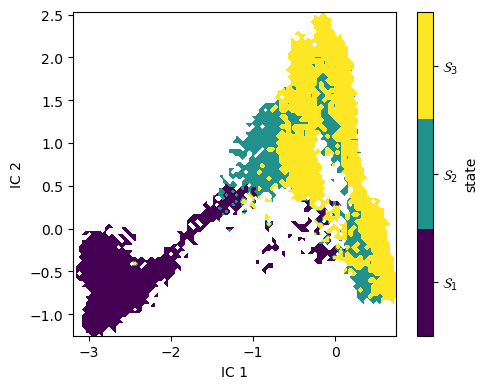

In [142]:
metastable_traj = new_assignment[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update.png',dpi=400)

In [124]:
# Map the original metastable distributions to the new ones
new_metastable_distributions = [msm.metastable_distributions[mapping[i]] for i in range(n_macrostates)]

# Sample from the new metastable distributions
pcca_samples = msm.sample_by_distributions(new_metastable_distributions, 10)

# Load the source data
torsions_source = pyemma.coordinates.source(files, top='../adaptive_sampling_features/10.gro')

# Save the trajectories
pyemma.coordinates.save_trajs(
    torsions_source,
    pcca_samples,
    outfiles=['./ca_pair/pcca{}_pair.gro'.format(n + 1) for n in range(n_macrostates)])


Obtaining file info:   0%|                               | 0/11 [00:00<?, ?it/s]

['./ca_pair/pcca1_pair.gro',
 './ca_pair/pcca2_pair.gro',
 './ca_pair/pcca3_pair.gro',
 './ca_pair/pcca4_pair.gro']

In [118]:
# Compute MFPTs between all pairs of new PCCA+ states
mfpts = np.zeros((len(mapping), len(mapping)))
for i in range(len(mapping)):
    for j in range(len(mapping)):
        if i != j:
            mfpts[i, j] = msm.mfpt(
                msm.metastable_sets[new_assignment[i]],
                msm.metastable_sets[new_assignment[j]]
            )

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3,4
1,0.000000e+00,251.53,192.98,503185.33
2,1.239001e+09,0.00,270.94,488291.49
3,3.104282e+10,9013698.34,0.00,1299.47
4,3.112031e+10,9040610.58,359.06,0.00


In [119]:
# Normalize the rows of the metastable transition matrix
transition_percentages = metastable_T / metastable_T.sum(axis=1)[:, np.newaxis]
df_percentage = pd.DataFrame(transition_percentages, 
                             index=range(1, n_metastable_states + 1), 
                             columns=range(1, n_metastable_states + 1))
print(df_percentage * 100)  # Convert fractions to percentages


          1          2          3          4
1  3.774744   0.000000   0.000000  96.225256
2  0.000000  19.603186   0.000000  80.396814
3  0.000000   0.000000  94.734907   5.265093
4  0.740768   1.670703   0.155579  97.432951


In [120]:
start, final = 0, 3
A = msm.metastable_sets[start]
B = msm.metastable_sets[final]
flux = pyemma.msm.tpt(msm, A, B)

cg, cgflux = flux.coarse_grain(msm.metastable_sets)

In [121]:
## NEW MAPPING

In [122]:
# Map the original metastable assignments to the new ones
new_metastable_assignments = [mapping[state] for state in msm.metastable_assignments]

# Create the new metastable sets based on the new assignments
new_metastable_sets = [np.where(np.array(new_metastable_assignments) == i)[0] for i in range(n_macrostates)]

# Define A and B using the new metastable sets
start, final = 0, 3
A = new_metastable_sets[start]
B = new_metastable_sets[final]

# Compute the flux using TPT
flux = pyemma.msm.tpt(msm, A, B)

# Coarse grain the flux
cg, cgflux = flux.coarse_grain(new_metastable_sets)


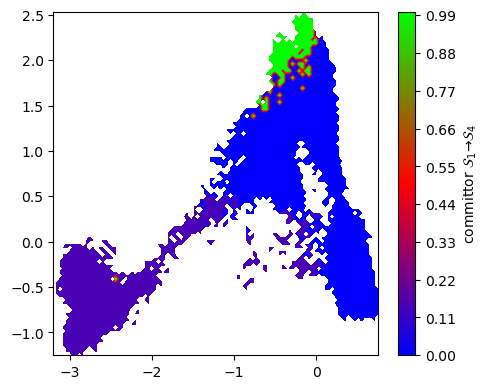

In [123]:
fig, ax = plt.subplots(figsize=(5, 4))

pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    flux.committor[dtrajs_concatenated],
    cmap='brg',
    ax=ax,
    mask=True,
    cbar_label=r'committor $\mathcal{S}_%d \to \mathcal{S}_%d$' % (
        start + 1, final + 1))
fig.tight_layout()
plt.savefig('commitor.png',dpi=300)